<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Metodo_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método Implícito de Crank Nicolson**

Resolver númericamente la ecuaión de calor:

$$\frac{∂u}{∂t}(x,t)=\frac{∂^2u}{∂x^2}(x,t) \quad 0<x<1, \quad 0<t $$

Sujeto a las condiciones de frontera
$$u(0,t)=0, \qquad u(1,t)=0 \qquad \text{para} \qquad t\geq0$$

y condición inicial
$$u(x,0)=1 - 4\left(x - \tfrac{1}{2}\right)^2,
\qquad 0 \le x\le 1$$


Para ello usare el método Implicito de Crank Nicolson con:

$$ h=\frac{1}{10}, \qquad k=0.01, \qquad r=\frac{\alpha^2k}{h^2}$$

A continuación mostraremos cual es la idea general de este método. Partimos de la ecuación de calor:

$$\frac{∂u}{∂t}(x,t)=\frac{∂^2u}{∂x^2}(x,t)$$

De modo que trabando de manera númerica sobre una malla:
$$ x_i=ih, \qquad t_j=jk,$$

y aproximamos: $u_{i,j} ≈u(x_i, t_j)$


1. Utilizaremos diferencias finitas para la aproximación.

    1.1  Derivada temporal (diferencias progresivas)

    $$ \frac{\partial u}{\partial t}(x_i, t_j) ≈ \frac {u_{i,j+1}- u_{i,j}}{k} $$
    Esto aproxima la derivada en el "punto medio":  
    $$
    t_{j+\frac12} = t_j + \frac{k}{2}
    $$

    1.2 Derivada espacial centrada en $t_j$

    $$
    \frac{\partial^2 u}{\partial x^2}(x_i,t_j)
    \approx
    \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}.
    $$


    1.3 Derivada espacial centrada en $t_{j+1}$

    $$
    \frac{\partial^2 u}{\partial x^2}(x_i,t_{j+1})
    \approx
    \frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}.
    $$


2. La idea del método de Nicolson es considerar el promedio de derivadas espaciales en $t_j$ y $t_{j+1}$

$$
\frac{\partial^2 u}{\partial x^2}(x_i,t_{j+\frac12})
\approx
\frac{1}{2}
\left[
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}
+
\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}
\right].
$$

Esta elección otorga **segundo orden** en tiempo y en espacio.



3. Sustituir en la ecuación de calor, las aproximaciones en diferencias finitas.

Sustituimos en:

$$
\frac{u_{i,j+1}-u_{i,j}}{k}
=
\frac{1}{2}
\left[
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}
+
\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}
\right]$$

Multiplicamos ambos lados por $k$

$$
u_{i,j+1}-u_{i,j}
=
\frac{k}{2h^2}
\left[
(u_{i+1,j}-2u_{i,j}+u_{i-1,j})
+
(u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1})
\right].
$$

4. Definición del párametro del método $r$

Es cual esta definido como la razon de:
$$r=\frac{\alpha^2 k}{h^2}$$

Sustituyendo los valores obtengo:

$$ r=\frac{(1)^2 (0.01)}{(0.1)^2} =1 $$


5. Distribuimos y agrupamos términos con indice $j+1$

$$
-r\,u_{i-1,j+1}
+
(2+2r)\,u_{i,j+1}
-
r\,u_{i+1,j+1}
=
r\,u_{i-1,j}
+
(2-2r)\,u_{i,j}
+
r\,u_{i+1,j},
$$

para $$i=1,2,\ldots,m-1$$.

Esta es la **formula general del método de Crank- Nicolson**  

6. Moleculas computacionales de este método son:

$$
\begin{matrix}
& \quad & u_{i,j+1} & \\
u_{i-1,j} & \quad &  u_{i,j}   & \quad & u_{i+1,j} \\
\end{matrix}
$$


7. Forma matricial del método

Considerando

$$[2I-rT_{m-1}]u_j= [2I+rT_{m-1}]u_{j-1}$$

por lo que:

$$u_j=[2I-rT_{m-1}]^{-1}[2I-rT_{m-1}]u_{j-1}$$

Donde:

$T_{m-1}$ es la matriz tridiagonal dada de la siguiente forma:

$$
T_{m-1} =
\begin{pmatrix}
-2 & 1  & 0  & \cdots & 0 \\
1  & -2 & 1  & \cdots & 0 \\
0  & 1  & -2 & \ddots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2
\end{pmatrix}.
$$
Además

$$
U_j =
\begin{pmatrix}
u_{1,j}\\
u_{2,j}\\
\vdots\\
u_{m-1,j}
\end{pmatrix}.
$$

La ecuación puede escribirse como:

$$
A\,U_{j+1} = B\,U_{j}.
$$

Donde:

$$
A =
\begin{pmatrix}
2+2r & -r      & 0       & \cdots & 0 \\
-r   & 2+2r    & -r      & \cdots & 0 \\
0    & -r      & 2+2r    & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -r \\
0 & 0 & 0 & -r & 2+2r
\end{pmatrix}
$$

$$
B =
\begin{pmatrix}
2-2r & r      & 0       & \cdots & 0 \\
r    & 2-2r   & r       & \cdots & 0 \\
0    & r      & 2-2r    & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & r \\
0 & 0 & 0 & r & 2-2r
\end{pmatrix}
$$


Por lo tanto la relacion fundamental del método es:

$
\begin{pmatrix}
2+2r & -r & 0 & \cdots & 0 \\
-r & 2+2r & -r & \cdots & 0 \\
0 & -r & 2+2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2+2r
\end{pmatrix}*\begin{pmatrix}
u_{1j}\\
u_{2j} \\
u_{3j}\\
\vdots  \\
u_{m-1,j}
\end{pmatrix}$ =

$\begin{pmatrix}
2-2r & r & 0 & \cdots & 0 \\
r & 2-2r & r & \cdots & 0 \\
0 & r & 2-2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2-2r
\end{pmatrix}*\begin{pmatrix}
u_{1,j-1}\\
u_{2,j-1} \\
u_{3,j-1}\\
\vdots  \\
u_{m-1,j-1}
\end{pmatrix}$




8. Forma compacta

Definimos la matriz tridiagonal $t_{m-1}=T$

Entonces:

$$
A = 2I + rT, \qquad B = 2I - rT.
$$

Y queda:

$$
U_{j+1} = A^{-1} B\,U_{j}.
$$

9. Sustitución del ejercicio $h = 0.1, k = 0.01, r=1$

La matriz $A = 2I + 2rI - rT$ se convierte en:

$
A=
\begin{pmatrix}
4 & -1 & 0 & \cdots & 0 \\
-1 & 4 & -1 & \cdots & 0 \\
0 & -1 & 4 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -1 \\
0 & 0 & 0 & -1 & 4
\end{pmatrix}.
$

Igualmente:

$
B=
\begin{pmatrix}
0 & 1 & 0 & \cdots & 0 \\
1 & 0 & 1 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & 0
\end{pmatrix}
+
2I.
$

Entonces la relación queda:

$
A\,U_j = B\,U_{j-1}.
$

$\begin{pmatrix}
4 & -1 & 0 & \cdots & 0 \\
-1 & 4 & -1 & \cdots & 0 \\
0 & -1 & 4 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 4
\end{pmatrix}*\begin{pmatrix}
u_{11}\\
u_{21} \\
u_{31}\\
\vdots  \\
u_{81}\\
u_{91}
\end{pmatrix}=\begin{pmatrix}
u_{20}\\
u_{10}+u_{30} \\
u_{20}+u_{40}\\
\vdots  \\
u_{70}+u_{90}\\
u_{80}
\end{pmatrix}$


In [212]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

from tabulate import tabulate #Libreria para crear tablas y tabular

Defino la función que corresponde a la condición inicial
$$u(x,0)=1 - 4\left(x - \tfrac{1}{2}\right)^2$$

In [213]:
def f(x):
  return 1-4*(x-0.5)**2

Gráfico la función para ver su comportamiento

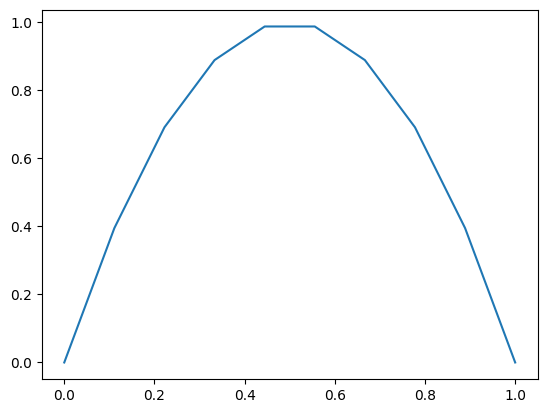

In [214]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

Escribimos la matriz A de forma manual

In [242]:
A = sp.Matrix([[4,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 4,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 4,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 4,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 4,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 4,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 4,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 4,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 4,]])

Escribiendo la matriz A de manera más simple.

In [243]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

In [244]:
r=1

In [245]:
A=tridiagonal(9, 2 + 2*r, -r)
A    #Corrresponde a la matriz de lado izquierdo de la igualdad

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [219]:
B = tridiagonal(9, 2 - 2*r, r)
B    #Corrresponde a la matriz de lado derecho de la igualdad

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Defino el vector b, el cual cumple con la condicion inicial en el eje x

In [220]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

Defino el método de Crank Nicolson

In [221]:
def crank_nicolson(A, B, b, j) :
  b_1 = B*b
  S = []
  for i in range(j) :
    sol = A.LUsolve(b_1)
    S.append(sol.T)
    b_1 = B*sol

  return sp.Matrix(S)  # matriz resultado

In [222]:
j=50

In [223]:
U = crank_nicolson(A, B, b, j)

### **Ejercicio 1.**
Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería `tabulate`.


A continuación creamos la tabla con un tiempo de $t= 0.01, ... , 1$

In [246]:
data = [list(U.row(i)) for i in range(10)]  # 10 tiempos

# columna del tiempo t
tiempos = [f"t={0.01*i:.2f}" for i in range(10)]

#Construyo la nueva tabal con la columna extra
data_con_tiempo = []

for i in range (10):
  fila = [tiempos[i]]+ data[i]
  data_con_tiempo.append(fila)

#encabezados: para t y luego las x_i, i=1, ...,9
encabezado = ["t"] + [f"x_{j+1}" for j in range(len(data[0]))]

#imprimir la tabla final
print (tabulate([encabezado]+ data_con_tiempo, tablefmt="grid"))


+--------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| t      | x_1               | x_2               | x_3               | x_4               | x_5               | x_6               | x_7               | x_8               | x_9               |
+--------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| t=0.00 | 0.301436464088398 | 0.565745856353591 | 0.761546961325967 | 0.880441988950276 | 0.920220994475138 | 0.880441988950276 | 0.761546961325967 | 0.565745856353591 | 0.301436464088398 |
+--------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| t=0.01 | 0.267630414212020 | 0.504775800494

Convertimos la matriz U (es una matriz de SymPy) en un arreglo de NumPy de numeros reales. Es decir:

1. `U.tolist`: convierte la matriz simbolica de SymPy en una lista de listas
2. `np.array(...,dtype=float)`: Transforma esa lista en un arreglo NumPy, y además obliga a que todos los valores sean de tiempo float.

In [247]:
U_np = np.array(U.tolist(), dtype = float)

A continuación creamos una malla (grid) de puntos en el plano $(x,t)$, que posteriormente me servira para graficar 3D, mapa de colores, vosualización de soluciones, etc.

In [248]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)


Mapa de colores

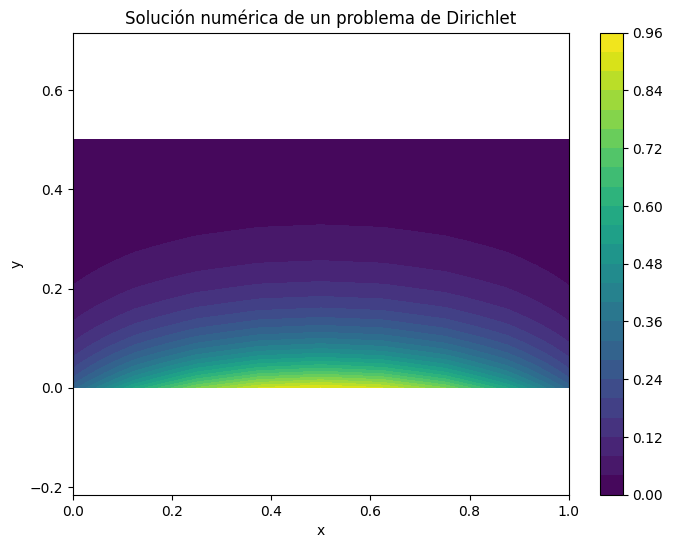

In [249]:

# Mapa de colores
plt.figure(figsize=(8, 6))  #Crea una figura de 8x6

contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)

# plt.coutourf crea un mapa de contornos rellenos
#Usa la malla (X,Y)
#utliza los calores numericos U_np
#levels=25 -> 25 niveles de color (más suave)
#cmap=cm.viridis → paleta de colores tipo “viridis” (azul→verde→amarillo)


plt.colorbar(contour) #Agrega la barra de colores que indica el valor númerico de cada tono
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')  #etiqueta los ejes
plt.ylabel('y')
plt.axis('equal') #Asegura que la escala sea proporcional en x e y.
plt.show()  #muestra el gráfico


En este contorno de colores muestra como evoluciona la solucion númerica $u(x,t)$ obtenida con el método Crank Nicolson.

- El eje x represnta los puntos espaciales $x$
- El eje y representa el tiempo $t$
- El color muestra la magnitud de la solución:
  - Colores oscuros -> valores pequeños
  - Colores claros -> valores más grandes.

El mapa de colores munesta la evolución de la solución, mostrando donde la temperatura es mayor o menor a lo largo del tiempo.

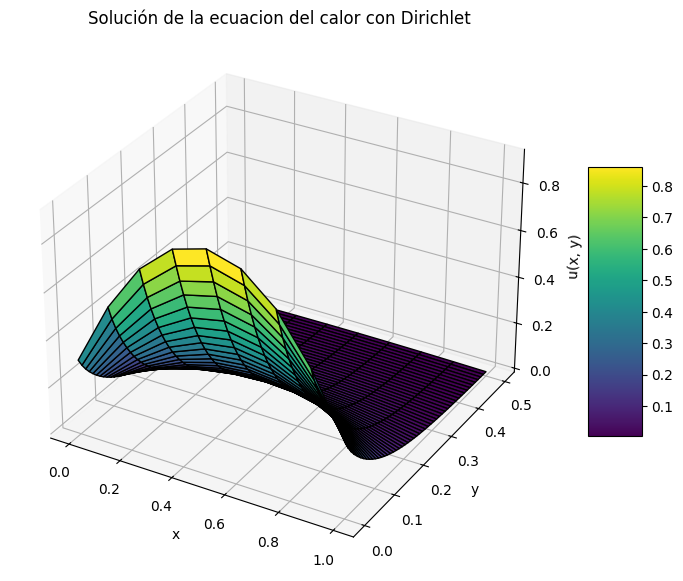

In [250]:
fig = plt.figure(figsize=(10, 7))   #crea una figura de 10x7
ax = fig.add_subplot(111, projection='3d')

# Crea un eje 3D dentro de la figura.
# 111 significa 1 fila, 1 columna, primer subplot.
# projection='3d' activa el modo tridimensional.
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')

#dibuja la superficie 3D usando:
  #x -> malla de pocisiones
  # y-> malla de tiempos
  # U.np -> matriz numerica con la solución
  # cmap=viridis -> paleta de colores
  # edgecolor='k' -> bordes negros para resaltar la malla
ax.set_title('Solución de la ecuacion del calor con Dirichlet')
ax.set_xlabel('x')    #etiqueta de los ejes: x pocisión
ax.set_ylabel('y')    #y tiempo
ax.set_zlabel('u(x, y)') # z magnitud de la solución
fig.colorbar(surf, shrink=0.5, aspect=5)

# grega la barra de colores.
# shrink=0.5 la hace más pequeña.
# aspect=5 controla su forma alargada.
plt.show()

Se observa como la distribución de temperatura cambia desde la condición incial hasta los tiempos posteriores.
Notemos que existe simetria en $x=0.05$, ademas decrece exponencialmente.

### **Ejercicio 2.**
La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.


Vamos a calcular la solución real utilizandop series de fourier


In [251]:
# Función  para la calcular la solución real para solución real utilizando series de fourier.
def solucion_real(x, t, n_terms=50):
    """
    Aproxima la solución analitica de la ecuación de calor mediante
    una serie de fourier truncada.
    """
    #para t=0 , se regresa a la condición inicial
    if t == 0:
        return 1 - 4 * (x - 0.5)**2


    #iniciamos u con ceros
    u_valor = np.zeros_like(x)

    #calculamos los coeficientes de manera númerica
    for n in range(1, n_terms + 1):

        a_n = 0   #se calcula mediante integración numerica
        N_malla = 1000
        puntos = np.linspace(0, 1, N_malla)

        for x_temp in puntos:
            a_n += (1 - 4*(x_temp - 0.5)**2) * np.sin(n * np.pi * x_temp)
        a_n *= 2 / N_malla


        #se suman los terminos corrrespondientes
        u_valor += a_n * np.sin(n * np.pi * x) * np.exp(-(n * np.pi)**2 * t)
    return u_valor

Convertimos la matriz SymPy a NumPy

In [252]:
U_real_calc = np.array(U.tolist(), dtype=float)

In [253]:
# Puntos espaciales (coinciden con los usados en Crank–Nicolson)
# Recordando que h = 0.1, entonces x toma: 0.1, 0.2, ..., 0.9
x_valores = np.linspace(0.1, 0.9, 9)

# Definimos los puntos temporales (con k = 0.01)
# Si j = 50, entonces t va desde 0 hasta 0.50
t_valores = np.linspace(0, 0.1, 10)

Construir la tabla de las soluciones exactas

In [256]:
# Generamos la  tabla con los valores reales
tabla_real = [] #aqui se almacenaran las filas de la tabla

# Encabezados: "t" seguido de los puntos x = 0.1, 0.2, ..., 0.9
encabezados = ["t"] + [f"{x:.1f}" for x in x_valores]

# Recorremos cada tiempo t
for idx_t, t in enumerate(t_valores):

    fila = [f"{t:.2f}"]   # primera columna: el tiempo

    # Para t = 0, usamos directamente la condición inicial
    if t == 0:
        valores_exactos = 1 - 4*(x_valores - 0.5)**2
    else:
        valores_exactos = solucion_real(x_valores, t, n_terms=50)

    # Formateamos cada valor a 4 decimales
    fila += [f"{v:.4f}" for v in valores_exactos]

    # Guardamos la fila en la tabla
    tabla_real.append(fila)

# Mostramos la tabla
print("\nTABLA DE SOLUCIÓN REAL UTILIZANDO SERIE DE FOURIER")
print(tabulate(tabla_real, headers=encabezados, tablefmt="grid"))



TABLA DE SOLUCIÓN REAL UTILIZANDO SERIE DE FOURIER
+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|    t |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |    0.6 |    0.7 |    0.8 |    0.9 |
+======+========+========+========+========+========+========+========+========+========+
| 0    | 0.36   | 0.64   | 0.84   | 0.96   | 1      | 0.96   | 0.84   | 0.64   | 0.36   |
+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0.01 | 0.2976 | 0.5566 | 0.7513 | 0.8704 | 0.9102 | 0.8704 | 0.7513 | 0.5566 | 0.2976 |
+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0.02 | 0.2602 | 0.4917 | 0.6714 | 0.7843 | 0.8227 | 0.7843 | 0.6714 | 0.4917 | 0.2602 |
+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0.03 | 0.2309 | 0.438  | 0.6009 | 0.7045 | 0.74   | 0.7045 | 0.6009 | 0.438  | 0.2309 |
+------+--------+--------+--------+--------+----

Calculo de los errores.
Para comprobar que tan bien funciona el método de Crank Nicolson, es necesario compararla con la solcuión real del problema. Por esta razón se calculan disitintos tipos de errores.

1. Error absoluto:
    Mide la diferenica entre la solución númerica y la solución exacta en cada punto de la malla. Este valor permite ver localmente donde puede haber más desviación.

2. Error Máximo: Es util ya que indica qué tan grande puede llegar a ser la desviación. Eso quiere decir que si este error es pequeño, significa que el método no tiene fallas en casi ningun punto.

3. Error promedio: Calcula el promedio global de todas las diferencias. Eso indica que si es pequeño, en promedio la solución númerica reproduce bien la solución exacta.





In [258]:
#Matriz paar almacenar la solución exacta
U_real_malla = np.zeros((len(y), len(x_valores)))

#Evaluamos la solución real en cada tiempo y posición
for idx_t, t_actual in enumerate(y):
    U_real_malla[idx_t, :] = solucion_real(x_valores, t_actual, n_terms=10)

#error_abs =np.abs(U_np- U_real_malla)
error_abs = np.abs(U_np - U_real_malla)

# Medidas del error
err_max   = np.max(error_abs)
err_mean  = np.mean(error_abs)

print(" ANÁLISIS DE ERRORES ")

print(f"Error máximo global : {err_max:.4f}")
print(f"Error promedio      : {err_mean:.4f}")


 ANÁLISIS DE ERRORES 
Error máximo global : 0.0798
Error promedio      : 0.0107


Dado que los errores son pequeños, podemos concluir que la implementación del método de Nicolson es correcta y adecuada para resolver la ecuación del calor.

In [262]:
encabezados_err = ["Tiempo"] + [f"x={x:.1f}" for x in x_valores]

tabla_err = []

for idx_t, t_val in enumerate(y[:10]):
    fila = [f"t={t_val:.2f}"] + [f"{e:.5f}" for e in error_abs[idx_t, :]]
    tabla_err.append(fila)

print("TABLA DE ERRORES | Solución Numérica - Solución Real\n")
print(tabulate(tabla_err, headers=encabezados_err, tablefmt="grid"))





TABLA DE ERRORES | Solución Numérica - Solución Real

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Tiempo   |   x=0.1 |   x=0.2 |   x=0.3 |   x=0.4 |   x=0.5 |   x=0.6 |   x=0.7 |   x=0.8 |   x=0.9 |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| t=0.00   | 0.05856 | 0.07425 | 0.07845 | 0.07956 | 0.07978 | 0.07956 | 0.07845 | 0.07425 | 0.05856 |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| t=0.01   | 0.03361 | 0.05783 | 0.06982 | 0.07456 | 0.07574 | 0.07456 | 0.06982 | 0.05783 | 0.03361 |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| t=0.02   | 0.02568 | 0.0466  | 0.06069 | 0.06806 | 0.07028 | 0.06806 | 0.06069 | 0.0466  | 0.02568 |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| t=0.03   | 0.0211

Grafica de las solución con el método de Crank Nicolson y la solución real

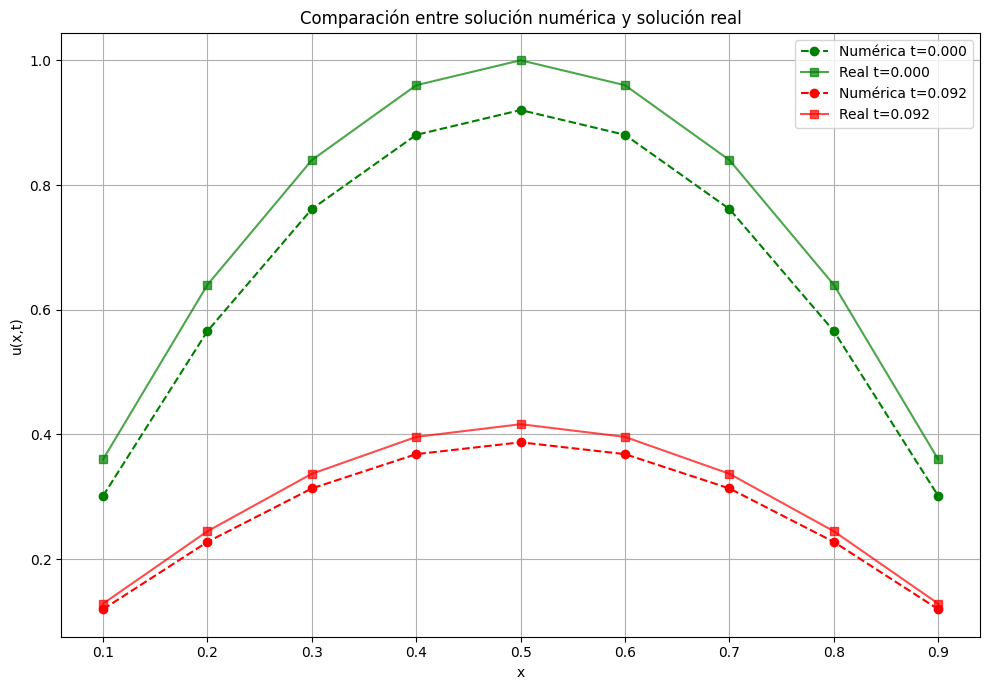

In [264]:
plt.figure(figsize=(10,7))
colores = ["green", "red"]
tiempos = [0, 9]     # t=0 y t=0.10 porque j=50  y[9] = 0.10

for c, idx_t in enumerate(tiempos):

    t_val = y[idx_t]              # el tiempo correspondiente
    u_num = U_np[idx_t, :]        # solución numérica en ese tiempo
    u_real_t = solucion_real(x_valores, t_val)  # solución real (evaluada)

    # Gráfica numérica
    plt.plot(x_valores, u_num, "o--", color=colores[c],
             label=f"Numérica t={t_val:.3f}")

    # Gráfica real
    plt.plot(x_valores, u_real_t, "s-", color=colores[c],
             alpha=0.7, label=f"Real t={t_val:.3f}")


plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Comparación entre solución numérica y solución real")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


En conclusión el método de Crank- Nicolson produjo calores muy cercanos a a la solución real, la cual se obtuvo con series de fourier.
Por otro lado el error máximo fue menor a 0.08 y el error menor fue 0.02, lo cual confirma la estabilidad y precisión de cicho método.
También podemos observar en la gráfica que la solución converge rapidamente a la solución exacta.